In [33]:
%load_ext autoreload
%autoreload 2

from source.config import RAW_DATA_DIR
import pandas as pd
import os
import matplotlib.pyplot as plt
from source.features_dir.vehicle_data_74t import convoy_vin
map_convoy_vin = convoy_vin()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
csv_files = [RAW_DATA_DIR / '2024_74t_position_data' / file for file in os.listdir(RAW_DATA_DIR / '2024_74t_position_data') if file.endswith('.csv')]
df = pd.concat([pd.read_csv(csv, sep=';', low_memory=False) for csv in csv_files], ignore_index=True)

In [35]:
df['Dato'] = pd.to_datetime(df['Dato'])
df['date'] = df['Dato'].dt.date
df["Hastighet"] = pd.to_numeric(df["Hastighet"].astype(str).str.replace(",", "."), errors="coerce")
df = df[df['Hastighet'] > 0]
df = df[(~df['Aktuell vekt'].isna()) & (df['Aktuell vekt'].notnull()) & (df['Aktuell vekt'] > 0)]
df = df[(~df['Akselvekt bak'].isna()) & (df['Akselvekt bak'].notnull()) & (df['Akselvekt bak'] > 0)]
df = df[(~df['Akselvekt henger foran'].isna()) & (df['Akselvekt henger foran'].notnull()) & (df['Akselvekt henger foran'] > 0)]
df = df[(~df['Akselvekt henger bak'].isna()) & (df['Akselvekt henger bak'].notnull()) & (df['Akselvekt henger bak'] > 0)]

In [36]:
df_agg = df.groupby(['VIN', 'date']).agg(
    max_vekt=('Aktuell vekt', 'max')
).reset_index()

In [37]:
df_60t = df_agg[df_agg['VIN'].isin(map_convoy_vin['3-akslet trekkvogn med 4-akslet tilhenger'])]
df_65t = df_agg[df_agg['VIN'].isin(map_convoy_vin['3-akslet trekkvogn med 5-akslet tilhenger'])]
df_68t = df_agg[df_agg['VIN'].isin(map_convoy_vin['4-akslet trekkvogn med 4-akslet tilhenger'])]
df_74t = df_agg[df_agg['VIN'].isin(map_convoy_vin['4-akslet trekkvogn med 5-akslet tilhenger'])]

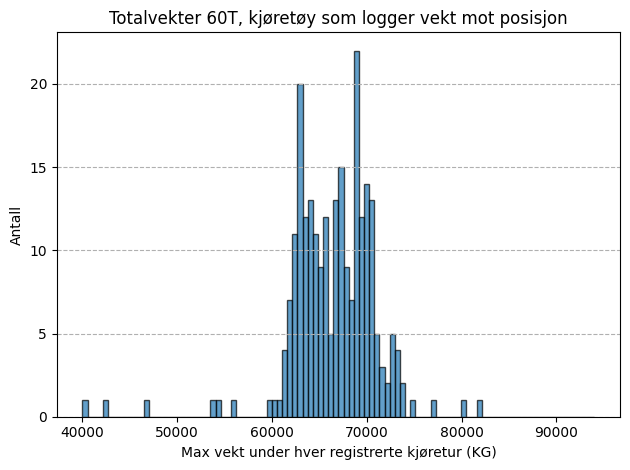

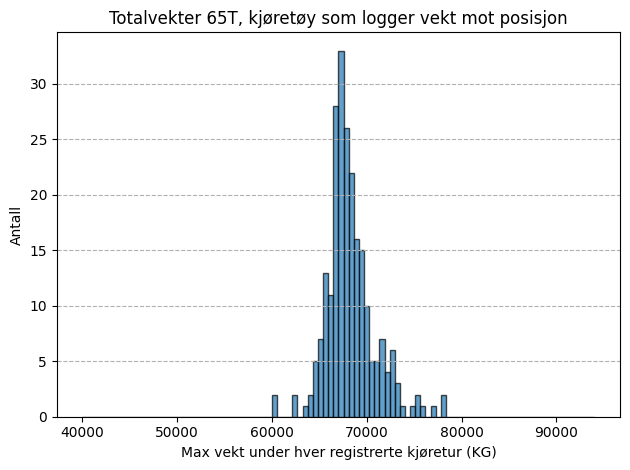

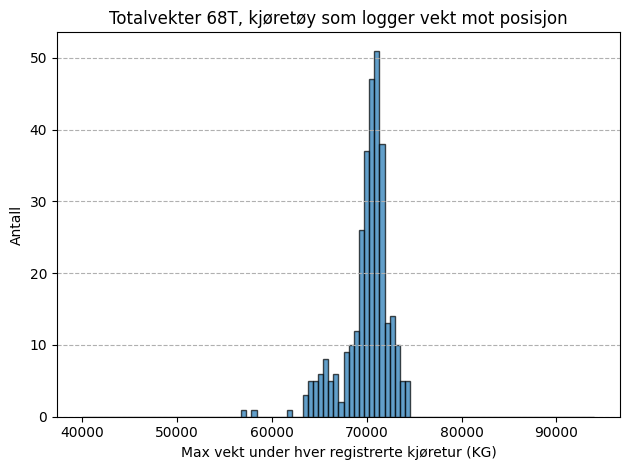

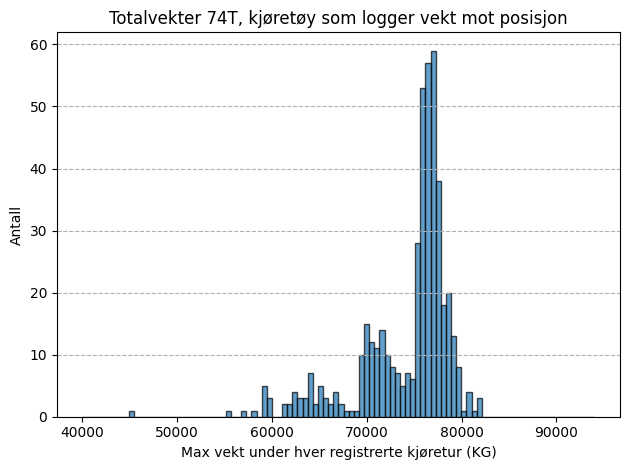

In [40]:
min_vekt, max_vekt = 40000, 94000

df_60t_filtered = df_60t[(df_60t["max_vekt"] >= min_vekt) & (df_60t["max_vekt"] <= max_vekt)]
df_65t_filtered = df_65t[(df_65t["max_vekt"] >= min_vekt) & (df_65t["max_vekt"] <= max_vekt)]
df_68t_filtered = df_68t[(df_68t["max_vekt"] >= min_vekt) & (df_68t["max_vekt"] <= max_vekt)]
df_74t_filtered = df_74t[(df_74t["max_vekt"] >= min_vekt) & (df_74t["max_vekt"] <= max_vekt)]

def plot_hist(data, title):
    plt.hist(data["max_vekt"], bins=100, range=(min_vekt, max_vekt), edgecolor="black", alpha=0.7)
    plt.title(title)
    plt.xlabel("Max vekt under hver registrerte kjøretur (KG)")
    plt.ylabel("Antall")
    plt.grid(axis="y", linestyle="--")
    plt.tight_layout()
    plt.show()

plot_hist(df_60t_filtered, "Totalvekter 60T, kjøretøy som logger vekt mot posisjon")
plot_hist(df_65t_filtered, "Totalvekter 65T, kjøretøy som logger vekt mot posisjon")
plot_hist(df_68t_filtered, "Totalvekter 68T, kjøretøy som logger vekt mot posisjon")
plot_hist(df_74t_filtered, "Totalvekter 74T, kjøretøy som logger vekt mot posisjon")